# For this model, the data comes from:

https://www.kaggle.com/zynicide/wine-reviews

# Import libaries that may be used

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble
pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import time
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from scipy.stats.mstats import winsorize
import warnings
from scipy import stats
from scipy.stats import yeojohnson
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn import tree
from IPython.display import Image
from sklearn import neighbors
!pip install pydotplus
!pip install graphviz
from IPython.display import HTML
from smart_open import open
import io
from google.colab import files
import base64
warnings.filterwarnings(action="ignore")

# Import the Data Set 


### import locally saved winemag-data-130k-v2.csv file from kaggle

In [0]:
uploaded = files.upload()
wine_df = pd.read_csv(io.BytesIO(uploaded['winemag-data-130k-v2.csv']))
wine_df.head(5)


Saving winemag-data-130k-v2.csv to winemag-data-130k-v2.csv


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Here is the data explained from Kaggle:

```
https://www.kaggle.com/zynicide/wine-reviews
```



1.   ***Country*** </br>
Country where wine is from
2.   ***Description***</br>
Description of wine, given by the taste tester
3.   ***Designation***</br>
The Vineyard within the winery where wine grapes are made.
4.   ***Points***</br>
The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
5.   ***Price***</br>
Cost of bottle of wine
6.  ***Province***</br>
province or state where wine is made
7.  ***Region 1*** </br>
region within province or state where wine is made
8.  ***Region 2***</br>
sometimes there are more specific regions
9.  ***Taster_name***</br>
Name of the taster
10.  ***Taster_Twitter_Handle***</br>
Tasters twitter account name
11.  ***Title***</br>
Wine name and vintage
12.  ***Variety***</br>
type of grapes used for wine
13.   ***Winery***</br>
winery that made the wine

# The goal of this model:

The goal of this model is to predict the score or rank of each wine, which in this case is "points" from 80 to 100. This model could be used to predict the point of a given wine given the features found in the data set. Someone could use this model to predict how good a wine is.

### set Dataframe with downloaded data

In [0]:
wine_df.head(5)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Conduct Data Analysis on dataset

In [0]:
print(wine_df.info())
wine_df = wine_df.drop_duplicates(keep='first')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB
None


## Check which values are categorical, and number of unique values

In [0]:
print('These are the categorical type features:\n')
categorical = wine_df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print('Column name: {}' .format(i))
    print('The number of unique values in this column is : {}' .format(column.nunique()))
    print('The number of null rows in this column is : {}\n\n' .format(column.isnull().sum())) 
    plt.show()  

These are the categorical type features:

Column name: country
The number of unique values in this column is : 43
The number of null rows in this column is : 63


Column name: description
The number of unique values in this column is : 119955
The number of null rows in this column is : 0


Column name: designation
The number of unique values in this column is : 37979
The number of null rows in this column is : 37465


Column name: province
The number of unique values in this column is : 425
The number of null rows in this column is : 63


Column name: region_1
The number of unique values in this column is : 1229
The number of null rows in this column is : 21247


Column name: region_2
The number of unique values in this column is : 17
The number of null rows in this column is : 79460


Column name: taster_name
The number of unique values in this column is : 19
The number of null rows in this column is : 26244


Column name: taster_twitter_handle
The number of unique values in this colu

### It looks like Taster_name,description,province, variety and country will be best to use for analysis and modeling.  They for the most part have under 1000 unique variables, which will be good for modeling, while description looks like it can be manipulated by counting the total characters. 

## Check which values are floats and integers

In [0]:
print('These are the float type features:\n')
floats = wine_df.select_dtypes(include=['float64'])
for i in floats:
    column = floats[i]
    print('Column name: {}' .format(i))
    print('The number of unique values in this column is : {}' .format(column.nunique()))
    print('The number of null rows in this column is : {}\n\n' .format(column.isnull().sum()))
    
    plt.show()  
print('\nThese are the integer type features:\n')
ints = wine_df.select_dtypes(include=['int'])
for i in ints:
    column = ints[i]
    print('\nColumn name: {}' .format((i)))
    print('The number of unique values in this column is : {}' .format(column.nunique()))
    print('The number of null rows in this column is : {}\n\n' .format(column.isnull().sum()))


These are the float type features:

Column name: price
The number of unique values in this column is : 390
The number of null rows in this column is : 8996



These are the integer type features:


Column name: Unnamed: 0
The number of unique values in this column is : 129971
The number of null rows in this column is : 0



Column name: points
The number of unique values in this column is : 21
The number of null rows in this column is : 0




### Points is our target variable, while price would be a good feature to be used for prediction. The model can also be set to predict price, where points would likely be a good feature to use for predition. 

# Now Set a new dataframe with features of interest

In [0]:
wine_df2 = wine_df[['title','country','taster_name','taster_twitter_handle','description', 'province','variety', 'price','points']]
wine_df2.head(5)

,title,country,taster_name,taster_twitter_handle,description,province,variety,price,points
0,Nicosia 2013 Vulkà Bianco (Etna),Italy,Kerin O’Keefe,@kerinokeefe,"Aromas include tropical fruit, broom, brimston...",Sicily & Sardinia,White Blend,nan,87
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth...",Douro,Portuguese Red,15.000,87
2,Rainstorm 2013 Pinot Gris (Willamette Valley),US,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and...",Oregon,Pinot Gris,14.000,87
3,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ...",Michigan,Riesling,13.000,87
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this...",Oregon,Pinot Noir,65.000,87


# Now deal with missing values in the columns

In [0]:
print('the percent of null values in columns is below:\n')
print(wine_df2.isnull().sum()*100/wine_df2.isnull().count())

the percent of null values in columns is below:

title                    0.000
country                  0.048
taster_name             20.192
taster_twitter_handle   24.015
description              0.000
province                 0.048
variety                  0.001
price                    6.922
points                   0.000
dtype: float64


### For price missing values are to be replaced by inserting the median. The median is inserted for price because an exponential decay histograph is shown. This means that the mean() should be effected by the outliers in the dataset. Likely a wine that costs alot of money due to "rarity".

### less then 1% of the data for Country,province, and variety are missing. Which means that dropping this data should not effect the overall model. Setting missing values to "none" in order to not drop data.

In [0]:
wine_df2["price"].fillna(wine_df2["price"].median(), inplace=True)
wine_df2["country"].fillna('None_country', inplace=True)
wine_df2["province"].fillna('None_province', inplace=True)
wine_df2["variety"].fillna('None_variety', inplace=True)

print('the percent of null values in columns is below:\n')
print(wine_df2.isnull().sum()*100/wine_df2.isnull().count())


the percent of null values in columns is below:

title                    0.000
country                  0.000
taster_name             20.192
taster_twitter_handle   24.015
description              0.000
province                 0.000
variety                  0.000
price                    0.000
points                   0.000
dtype: float64


### There does not seem to be an obvious way to fill missing values in the "taster_name" column. Try to replace missing values with "taster_twitter_handle" to fill in missing values. If it doesnt work just allow the missing values in twitter_name with "none". Dropping the twitter column should not effect the model since they essentially have the same data to identify the taster.

In [0]:
# try to replace twitter name values with twitter_handle
for i in range(0,len(wine_df2.taster_name)):
    if pd.isnull(wine_df2.taster_name[i]):
        wine_df2.taster_name[i] = wine_df2.taster_twitter_handle[i]
# post the amount of missing values
print('the percent of null values in columns is below:\n')
print(wine_df2.isnull().sum()*100/wine_df2.isnull().count())
# values did not change, meaning the missing rows for taster_name are the same as the twitter column
#replace taster name with "none" and drop taster_twitter_handle 
print('\nDid not lower the missing values, fill the rest with none and drop taster_twitter_handle\n')
wine_df2["taster_name"].fillna('None_taster', inplace=True)
wine_df2 = wine_df2.drop(columns = 'taster_twitter_handle')
print('\n\nthe percent of null values in columns is below:\n')
print(wine_df2.isnull().sum()*100/wine_df2.isnull().count())

the percent of null values in columns is below:

title                    0.000
country                  0.000
taster_name             20.192
taster_twitter_handle   24.015
description              0.000
province                 0.000
variety                  0.000
price                    0.000
points                   0.000
dtype: float64

Did not lower the missing values, fill the rest with none and drop taster_twitter_handle



the percent of null values in columns is below:

title         0.000
country       0.000
taster_name   0.000
description   0.000
province      0.000
variety       0.000
price         0.000
points        0.000
dtype: float64


### Now that missing values are corrected visualize the numerical data

In [0]:
# get univariate statistics of numerical data
wine_df2.describe()

,price,points
count,129971.000,129971.000
mean,34.646,88.447
std,39.664,3.040
min,4.000,80.000
25%,18.000,86.000
50%,25.000,88.000
75%,40.000,91.000
max,3300.000,100.000


Notice how points seem to go from 80 to 100 with an average of 88. Likely does not have alot of outliers.

Notice how price goes from 4$ to 3300$ with an average of 34$. Likely to have some sort of outliers. 


### Visualization of price. Looks like it has outliers. Need to figure out a way to deal with this data if it is to be used. The outliers definitely skew the data to not be normalized. Likely due to "rare" bottles of wine prices over 1000$


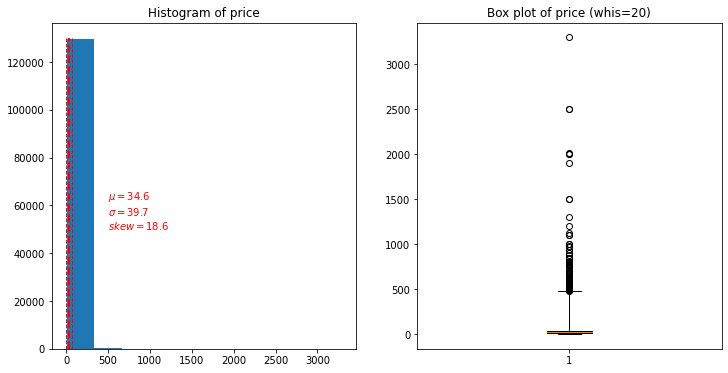

In [0]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
param = stats.norm.fit(wine_df2.price)
skew = wine_df2.price.skew()
# plot new data histogram
plt.hist(wine_df2.price)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=500, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.title('Histogram of price')
plt.plot([param[0], param[0]], [0, 130000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 130000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 130000], 'r--',lw=1)
plt.subplot(1,2,2)
plt.boxplot(wine_df2["price"],whis = 20)
plt.title("Box plot of price (whis=20)")
plt.show()


### Visualization of points.It looks very normalized with a skew of 0. This is the target data. 

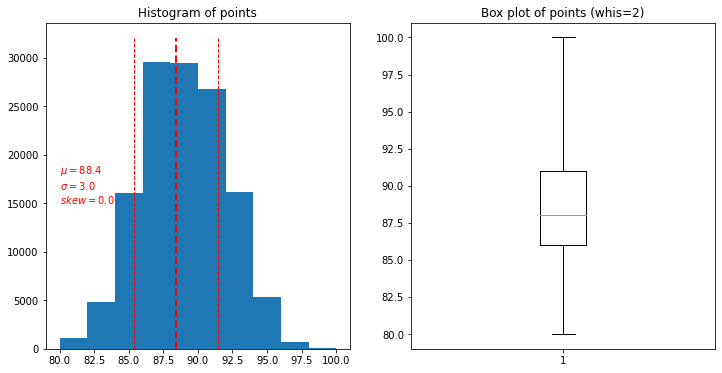

In [0]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
param = stats.norm.fit(wine_df2.points)
skew = wine_df2.points.skew()
# plot new data histogram
plt.hist(wine_df2.points)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=80, y=15000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.title('Histogram of points')
plt.plot([param[0], param[0]], [0, 32000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 32000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 32000], 'r--',lw=1)
plt.subplot(1,2,2)
plt.boxplot(wine_df2["points"],whis = 2)
plt.title("Box plot of points (whis=2)")
plt.show()

#### For the country,taster_name,variety, and province features here is some visualization to understand the data. From the bar graph of country it can be seen that the majority of the bottles are from the first 5-10 countries. This is the same for all these categorical variables where it is very top heavy. Also notice how the largest variable for taster_name, is the missing data variable. This could lead to bias and is worth noting.

####   For the taster_name data it looks like the majority of null values may significantly bias the data. So without a way to change the data we should not use this dataset for prediction purposes.

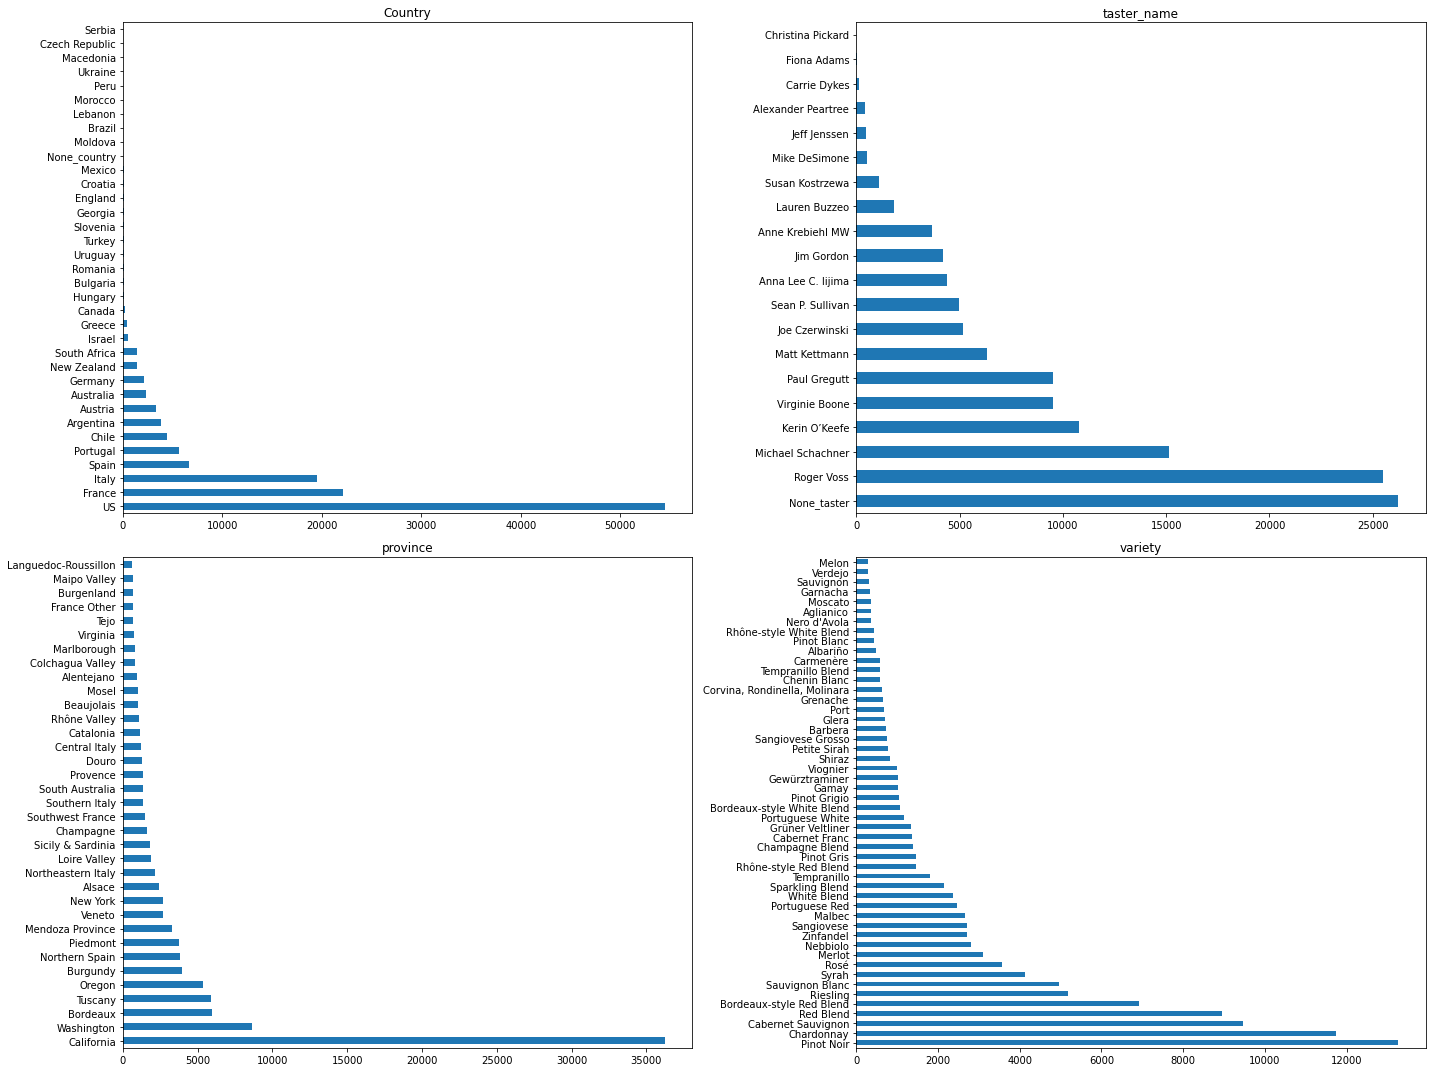

In [0]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
wine_df2['country'].value_counts()[:35].plot(kind='barh')
plt.title('Country')
plt.subplot(2,2,2)
wine_df2['taster_name'].value_counts()[:35].plot(kind='barh')
plt.title('taster_name')
plt.subplot(2,2,3)
wine_df2['province'].value_counts()[:35].plot(kind='barh')
plt.title('province')
plt.subplot(2,2,4)
wine_df2['variety'].value_counts()[:50].plot(kind='barh')
plt.title('variety')
plt.tight_layout()
plt.show()


In [0]:
# descriptive statistics for just text-based variables
wine_df2.describe(include=['O'])

,title,country,taster_name,description,province,variety
count,129971,129971,129971,129971,129971,129971
unique,118840,44,20,119955,426,708
top,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,US,None_taster,"Seductively tart in lemon pith, cranberry and ...",California,Pinot Noir
freq,11,54504,26244,3,36247,13272


As you can see from the categorical data above, all the features are very non normal, with the first few unique values containing most of the dataset. Also taster_name feature has the variable with the highest count being "None_taster" (26244 datapoints) which may mean this feature will likely bias the dataset with the missing values. 

For Title and Description features, there is alot of unique variables. There isnt much use for these features until some manipulation is done to them

# Data Exploration

### See how the plots of numerical data look when transforms are done on them:


### Remember that the price feature was very exponential, so conducting a logrimithic or other change to the data may be useful to normalize the data. Looks like log(price) would make the data the most normalized, which will be useful for modeling/prediction purposes

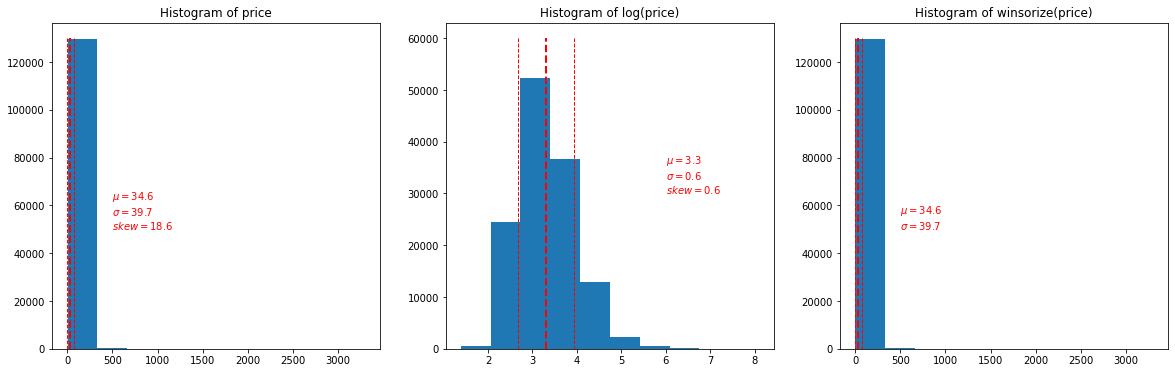

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
param = stats.norm.fit(wine_df2.price)
skew = wine_df2.price.skew()
# plot new data histogram
plt.hist(wine_df2.price)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=500, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.title('Histogram of price')
plt.plot([param[0], param[0]], [0, 130000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 130000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 130000], 'r--',lw=1)


plt.subplot(1,3,2)
param = stats.norm.fit(np.log(wine_df2.price))
skew = np.log(wine_df2.price).skew()
# plot new data histogram
plt.hist(np.log(wine_df2.price))

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=6, y=30000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.title('Histogram of log(price)')
plt.plot([param[0], param[0]], [0, 60000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 60000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 60000], 'r--',lw=1)


plt.subplot(1,3,3)
param = stats.norm.fit(winsorize(wine_df2.price))
# plot new data histogram
plt.hist(winsorize(wine_df2.price))

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=500, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] , color='r')
plt.title('Histogram of winsorize(price)')
plt.plot([param[0], param[0]], [0, 130000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 130000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 130000], 'r--',lw=1)



Put the price transformations in our wine dataframe, for further analysis.

In [0]:
wine_df2['log_price'] = np.log(wine_df2['price'])
wine_df2['winsorize_price'] = winsorize(wine_df2['price'],limits= (.05,.05))
print(wine_df2.head())

                                               title  ... winsorize_price
0                  Nicosia 2013 Vulkà Bianco  (Etna)  ...          25.000
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  ...          15.000
2      Rainstorm 2013 Pinot Gris (Willamette Valley)  ...          14.000
3  St. Julian 2013 Reserve Late Harvest Riesling ...  ...          13.000
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...  ...          65.000

[5 rows x 10 columns]


Now show a comparison of price vs points in a scatter plot

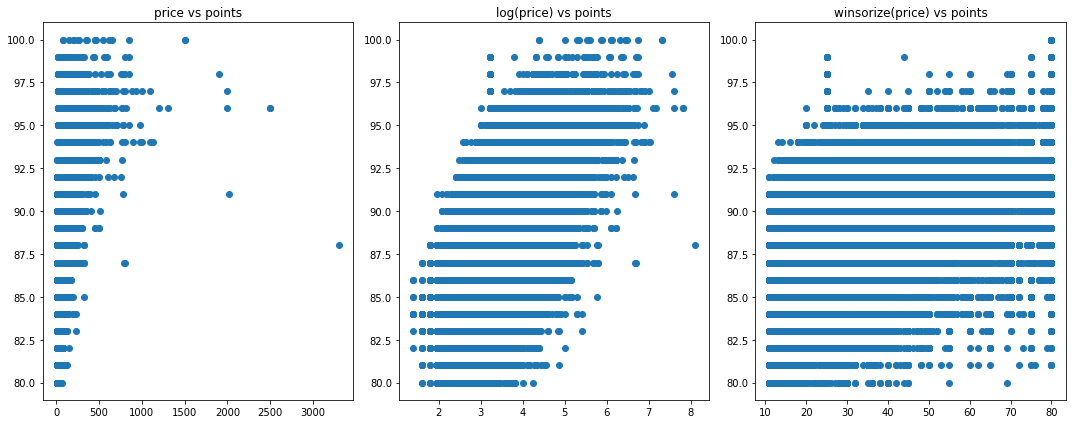

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(wine_df2.price,wine_df2.points)
plt.title("price vs points")
plt.subplot(1,3,2)
plt.scatter(wine_df2.log_price, wine_df2.points)
plt.title("log(price) vs points")
plt.subplot(1,3,3)
plt.scatter(wine_df2.winsorize_price,wine_df2.points)
plt.title("winsorize(price) vs points")
plt.tight_layout()
plt.show()

It looks like the log(price) has the most linear data  of the 3. This could be confirmed with a correlation matrix.


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

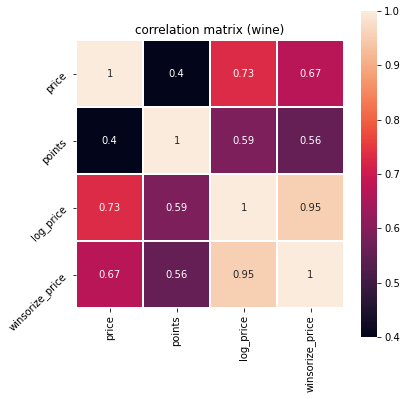

In [0]:

corrmat = wine_df2.corr()
plt.figure(figsize=(6,6))
# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (wine)")
plt.xticks(rotation=90)
plt.yticks(rotation=45)

It looks like there is a .59 correlation between log(price) and points. The plot of points vs log(price) shows a positive correlation too. This shows that the log(price) would be the best feature to use for this regression model.

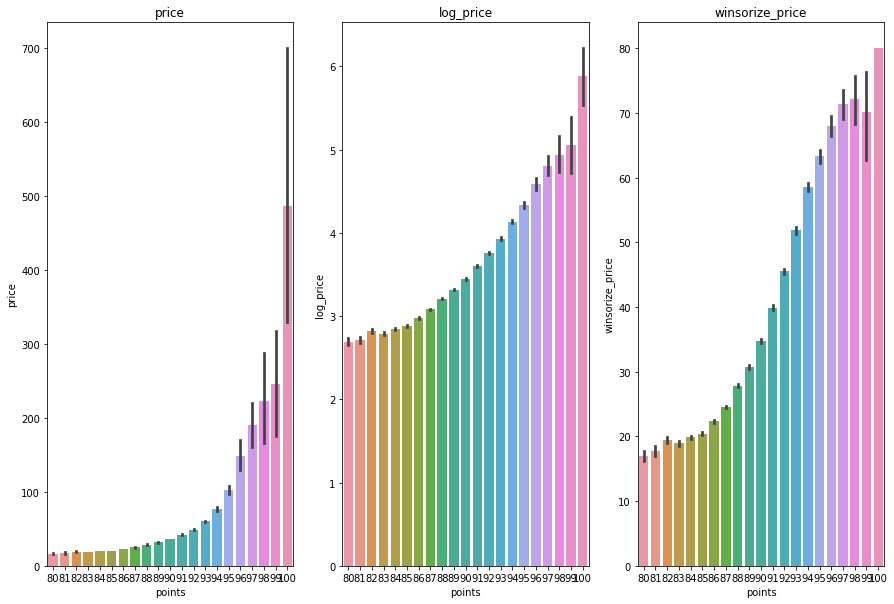

In [0]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.barplot(wine_df2["points"], wine_df2["price"])
plt.title("price")

plt.subplot(1,3,2)
sns.barplot(wine_df2["points"], wine_df2["log_price"])
plt.title("log_price")

plt.subplot(1,3,3)
sns.barplot(wine_df2["points"], wine_df2["winsorize_price"])
plt.title("winsorize_price")

plt.show()

It is clear the price is higher the better the score. However log_price shows the most linear relation, while the original data and winsorize show some exponential growth. 

# Feature Engineering

### Try to get a new column of years from the title of the wine  See if this would be a good feature for point predictions


In [0]:
wine_df2['year'] = wine_df2['title'].str.extract("(\d\d\d\d)", expand=False).apply(lambda x: int(x) if not pd.isna(x)  else np.nan)
print(wine_df2.head())
print(wine_df2.median())
wine_df2['year'] = wine_df2.year.fillna(wine_df2.year.median())
wine_df2['year'] = wine_df2.year.astype('int64')
print(wine_df2.year.unique())

                                               title  ...     year
0                  Nicosia 2013 Vulkà Bianco  (Etna)  ... 2013.000
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  ... 2011.000
2      Rainstorm 2013 Pinot Gris (Willamette Valley)  ... 2013.000
3  St. Julian 2013 Reserve Late Harvest Riesling ...  ... 2013.000
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...  ... 2012.000

[5 rows x 11 columns]
price               25.000
points              88.000
log_price            3.219
winsorize_price     25.000
year              2011.000
dtype: float64
[2013 2011 2012 2010 2007 2009 2008 2014 2015 2016 2004 2003 2006 2001
 2005 2002 1887 2000 1999 1991 1997 1996 1877 2017 1995 1872 1637 1868
 1898 1492 1998 7200 1852 1994 1992 1840 1929 1912 1875 1976 1964 1848
 1870 1856 1983 1967 1990 1988 1827 1860 1850 1000 1980 1987 1989 1993
 1969 1882 1935 1503 1821 1973 1978 1965 1968 1947 1963 1070 1985 1927
 1904 1847 1982 1986 1752 1789 1607 1621 1919 1957 1966 1984 1961 1845

In [0]:
wine_df2 = wine_df2.drop(columns = 'title')


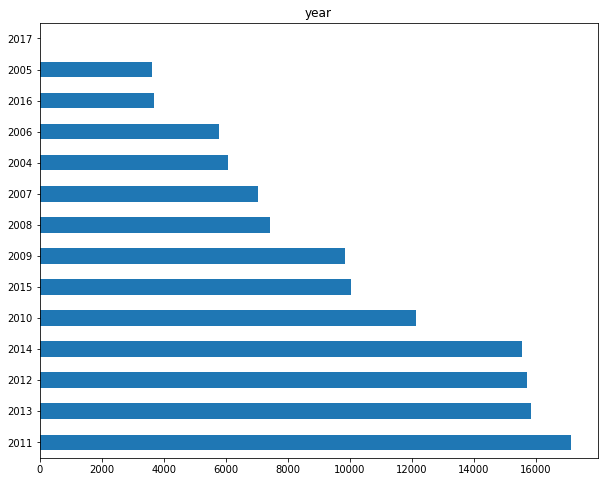

In [0]:
wine_df2['year'] = np.where((wine_df2.year >=2017 ), 2017,wine_df2.year)
wine_df2['year'] = np.where((wine_df2.year <=2004 ), 2004,wine_df2.year)
plt.figure(figsize=(10,8))
wine_df2.year.value_counts()[:20].plot(kind='barh')
plt.title('year')
plt.show()


Notice how there are ~4500 values for "1400" which were the blank/Nan values, and a very small amount of values under the year 1400. Which are likely incorrectly labeled. Values between 1000-2017 were kept because there is no way to tell which are correct or not. 

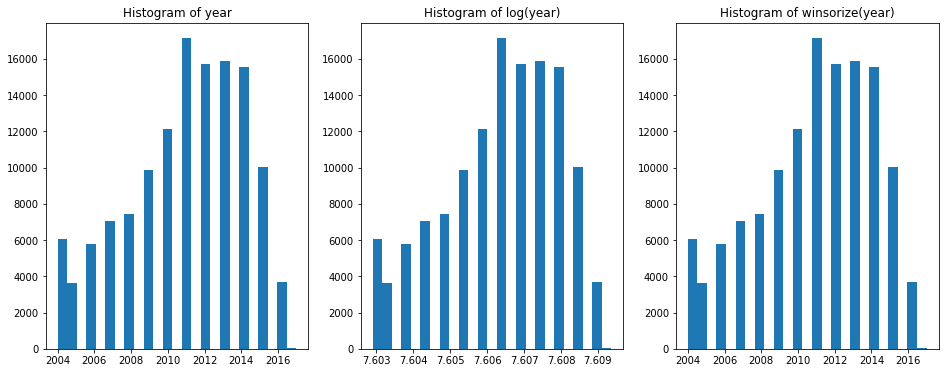

In [0]:

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
# plot new data histogram
plt.hist(wine_df2.year,bins = 25)

plt.title('Histogram of year')

plt.subplot(1,3,2)

# plot new data histogram
plt.hist(np.log(wine_df2.year),bins = 25)
plt.title('Histogram of log(year)')


plt.subplot(1,3,3)
# plot new data histogram
plt.hist(winsorize(wine_df2.year),bins = 25)
plt.title('Histogram of winsorize(year)')

plt.show()

Notice for the most part all the values are very close together. The spike at 1995 is the values that are null, and values that are below 1995. 

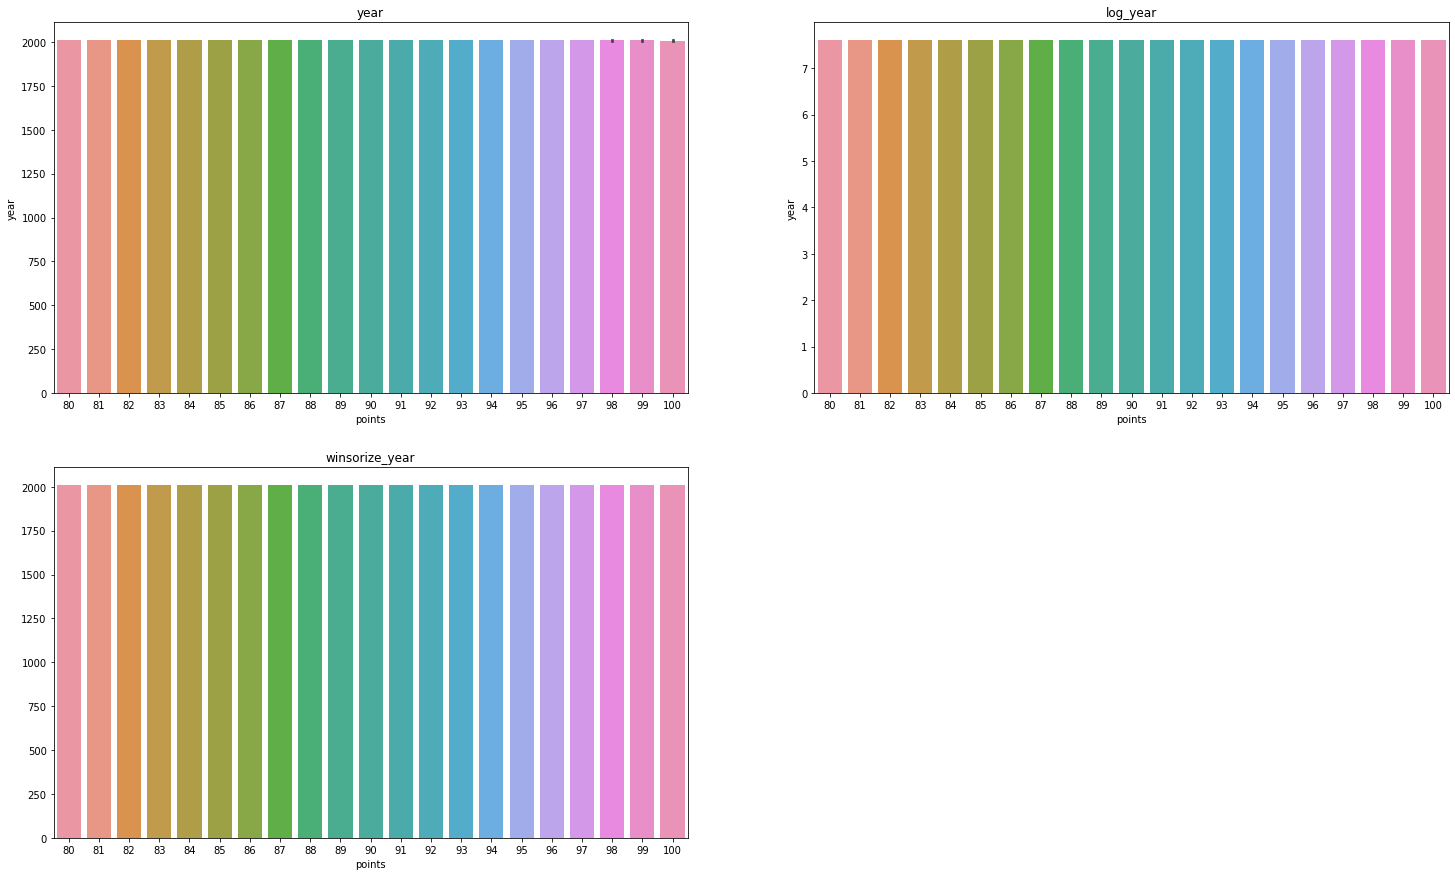

In [0]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.barplot(wine_df2["points"], wine_df2.year)
plt.title("year")

plt.subplot(2,2,2)
sns.barplot(wine_df2["points"],np.log(wine_df2.year))
plt.title("log_year")

plt.subplot(2,2,3)
sns.barplot(wine_df2["points"], winsorize(wine_df2.year,limits=(.05,.05)))
plt.title("winsorize_year")

plt.show()

The 3 plots above show that the years do not vary much against the change in points

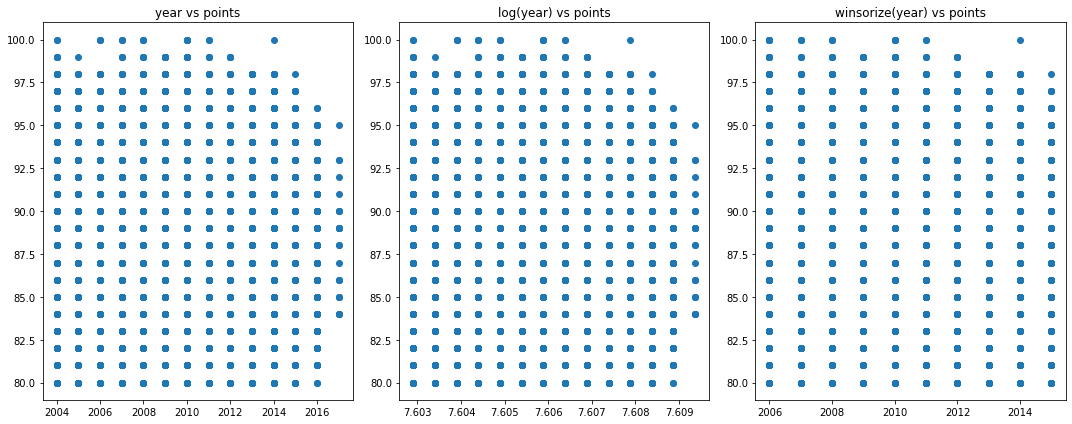

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(wine_df2.year,wine_df2.points)
plt.title("year vs points")
plt.subplot(1,3,2)
plt.scatter(np.log(wine_df2.year),wine_df2.points)
plt.title("log(year) vs points")
plt.subplot(1,3,3)
plt.scatter(winsorize(wine_df2.year,limits = (.1,.1)),wine_df2.points)
plt.title("winsorize(year) vs points")
plt.tight_layout()
plt.show()

It does not look like there is a correlation between year and points , try looking at it with a correlation matrix

Text(0.5, 1.0, 'correlation matrix (wine)')

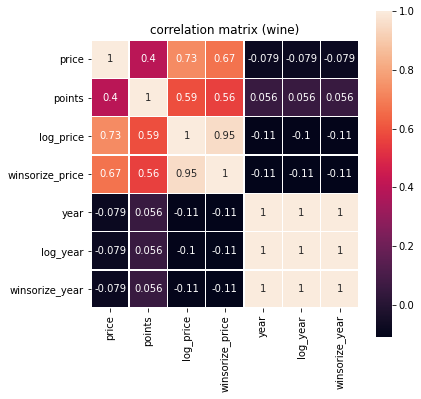

In [0]:
wine_df2['log_year'] = np.log(wine_df2.year)
wine_df2['winsorize_year'] = winsorize(wine_df2.year)
corrmat = wine_df2.corr()
plt.figure(figsize=(6,6))
# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (wine)")

Notice how the correlation for points are less than 0.1. This means that these values do not change with respect to points. Which was seen in the graphs above. However it may be useful for random forest and gradient boosting. However the value of 0.1 makes sense since the scatterplot/bargraphs show no linear or exponential growth between the two features. For that same reason, the log and winsorize of year are not going to be used since transformations do not help normalize the data. 

### Try to get a new column of character count of description from the taste tester. See if length of description would be a good feature for price predictions


In [0]:
wine_df2.head()

,country,taster_name,description,province,variety,price,points,log_price,winsorize_price,year,log_year,winsorize_year
0,Italy,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Sicily & Sardinia,White Blend,25.000,87,3.219,25.000,2013,7.607,2013
1,Portugal,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Douro,Portuguese Red,15.000,87,2.708,15.000,2011,7.606,2011
2,US,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",Oregon,Pinot Gris,14.000,87,2.639,14.000,2013,7.607,2013
3,US,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Michigan,Riesling,13.000,87,2.565,13.000,2013,7.607,2013
4,US,Paul Gregutt,"Much like the regular bottling from 2012, this...",Oregon,Pinot Noir,65.000,87,4.174,65.000,2012,7.607,2012


In [0]:
# make new column called description_length
# which is the length of the description in each row
wine_df2['description_length'] = wine_df2['description'].str.len()
print('There are {} unique values in the description_length column ' .format(wine_df2.description_length.nunique()))
wine_df2 = wine_df2.drop(columns = 'description')


There are 577 unique values in the description_length column 


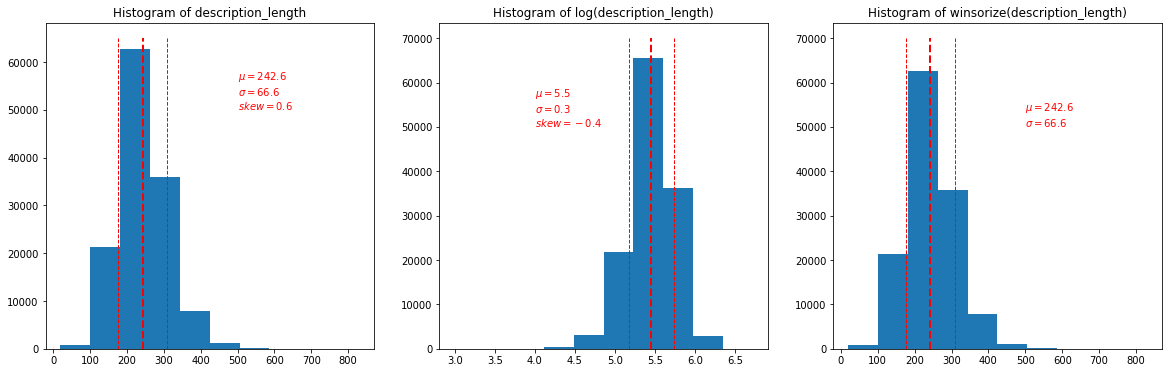

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
param = stats.norm.fit(wine_df2.description_length)
skew = wine_df2.description_length.skew()
# plot new data histogram
plt.hist(wine_df2.description_length)

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=500, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.plot([param[0], param[0]], [0, 65000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 65000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 65000], 'r--',lw=1)
plt.title('Histogram of description_length')

plt.subplot(1,3,2)
param = stats.norm.fit(np.log(wine_df2.description_length))
skew = np.log(wine_df2.description_length).skew()
# plot new data histogram
plt.hist(np.log(wine_df2.description_length))

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=4, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] + '\n' + '$skew=%0.1f$' % skew, color='r')
plt.title('Histogram of log(description_length)')
plt.plot([param[0], param[0]], [0, 70000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 70000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 70000], 'r--',lw=1)


plt.subplot(1,3,3)
param = stats.norm.fit(winsorize(wine_df2.description_length))
# plot new data histogram
plt.hist(winsorize(wine_df2.description_length))

# Plot some fancy text to show us what the paramters of the distribution are (mean and standard deviation)
plt.text(x=500, y=50000, s=r"$\mu=%0.1f$" % param[0] + "\n" + r"$\sigma=%0.1f$" % param[1] , color='r')
plt.title('Histogram of winsorize(description_length)')
plt.plot([param[0], param[0]], [0, 70000], 'r--',lw=2)
plt.plot([param[0]-param[1], param[0]-param[1]], [0, 70000], 'r--',lw=1)
plt.plot([param[0]+param[1], param[0]+param[1]], [0, 70000], 'r--',lw=1)

plt.show()

#### The description length data looks normalized with a slight skew to the left. With a mean of 242 and standard deviation of 67

### add the new transformed 'description' to wine dataframe features for data analysis. Then explore how the data and points relate.

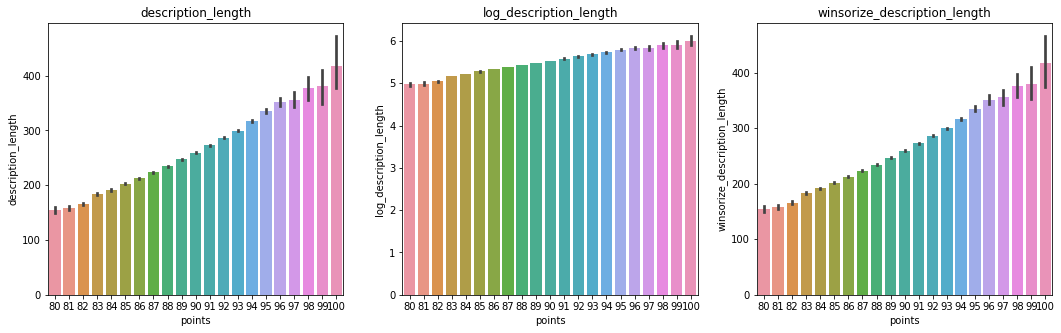

In [0]:
wine_df2['winsorize_description_length'] = winsorize(wine_df2['description_length'])
wine_df2['log_description_length'] = np.log(wine_df2['description_length'])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(wine_df2["points"], wine_df2["description_length"])
plt.title("description_length")

plt.subplot(1,3,2)
sns.barplot(wine_df2["points"], wine_df2["log_description_length"])
plt.title("log_description_length")

plt.subplot(1,3,3)
sns.barplot(wine_df2["points"], wine_df2["winsorize_description_length"])
plt.title("winsorize_description_length")

plt.show()

Plot the data against Points to see how description vs price looks

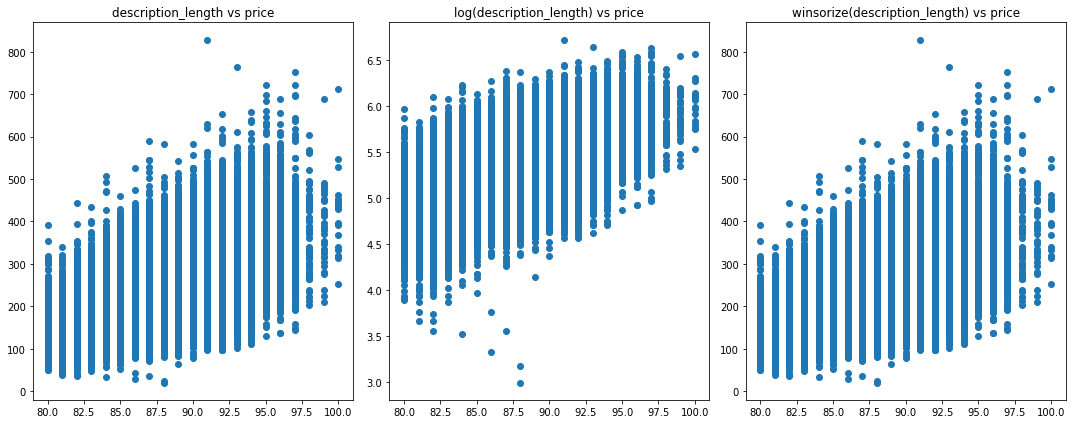

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(wine_df2.points,wine_df2.description_length)
plt.title("description_length vs price")
plt.subplot(1,3,2)
plt.scatter(wine_df2.points,wine_df2.log_description_length)
plt.title("log(description_length) vs price")
plt.subplot(1,3,3)
plt.scatter(wine_df2.points,wine_df2.winsorize_description_length)
plt.title("winsorize(description_length) vs price")
plt.tight_layout()
plt.show()

### all transformed description lengths look like they are equally correlated with eachother and with points. This means we should just use the original description_length variable, since no change should effect the overall accuracy.

Now that all the numeric variables are created through feature engineering, compare all the features through a pair plot to explore the data furthur. 

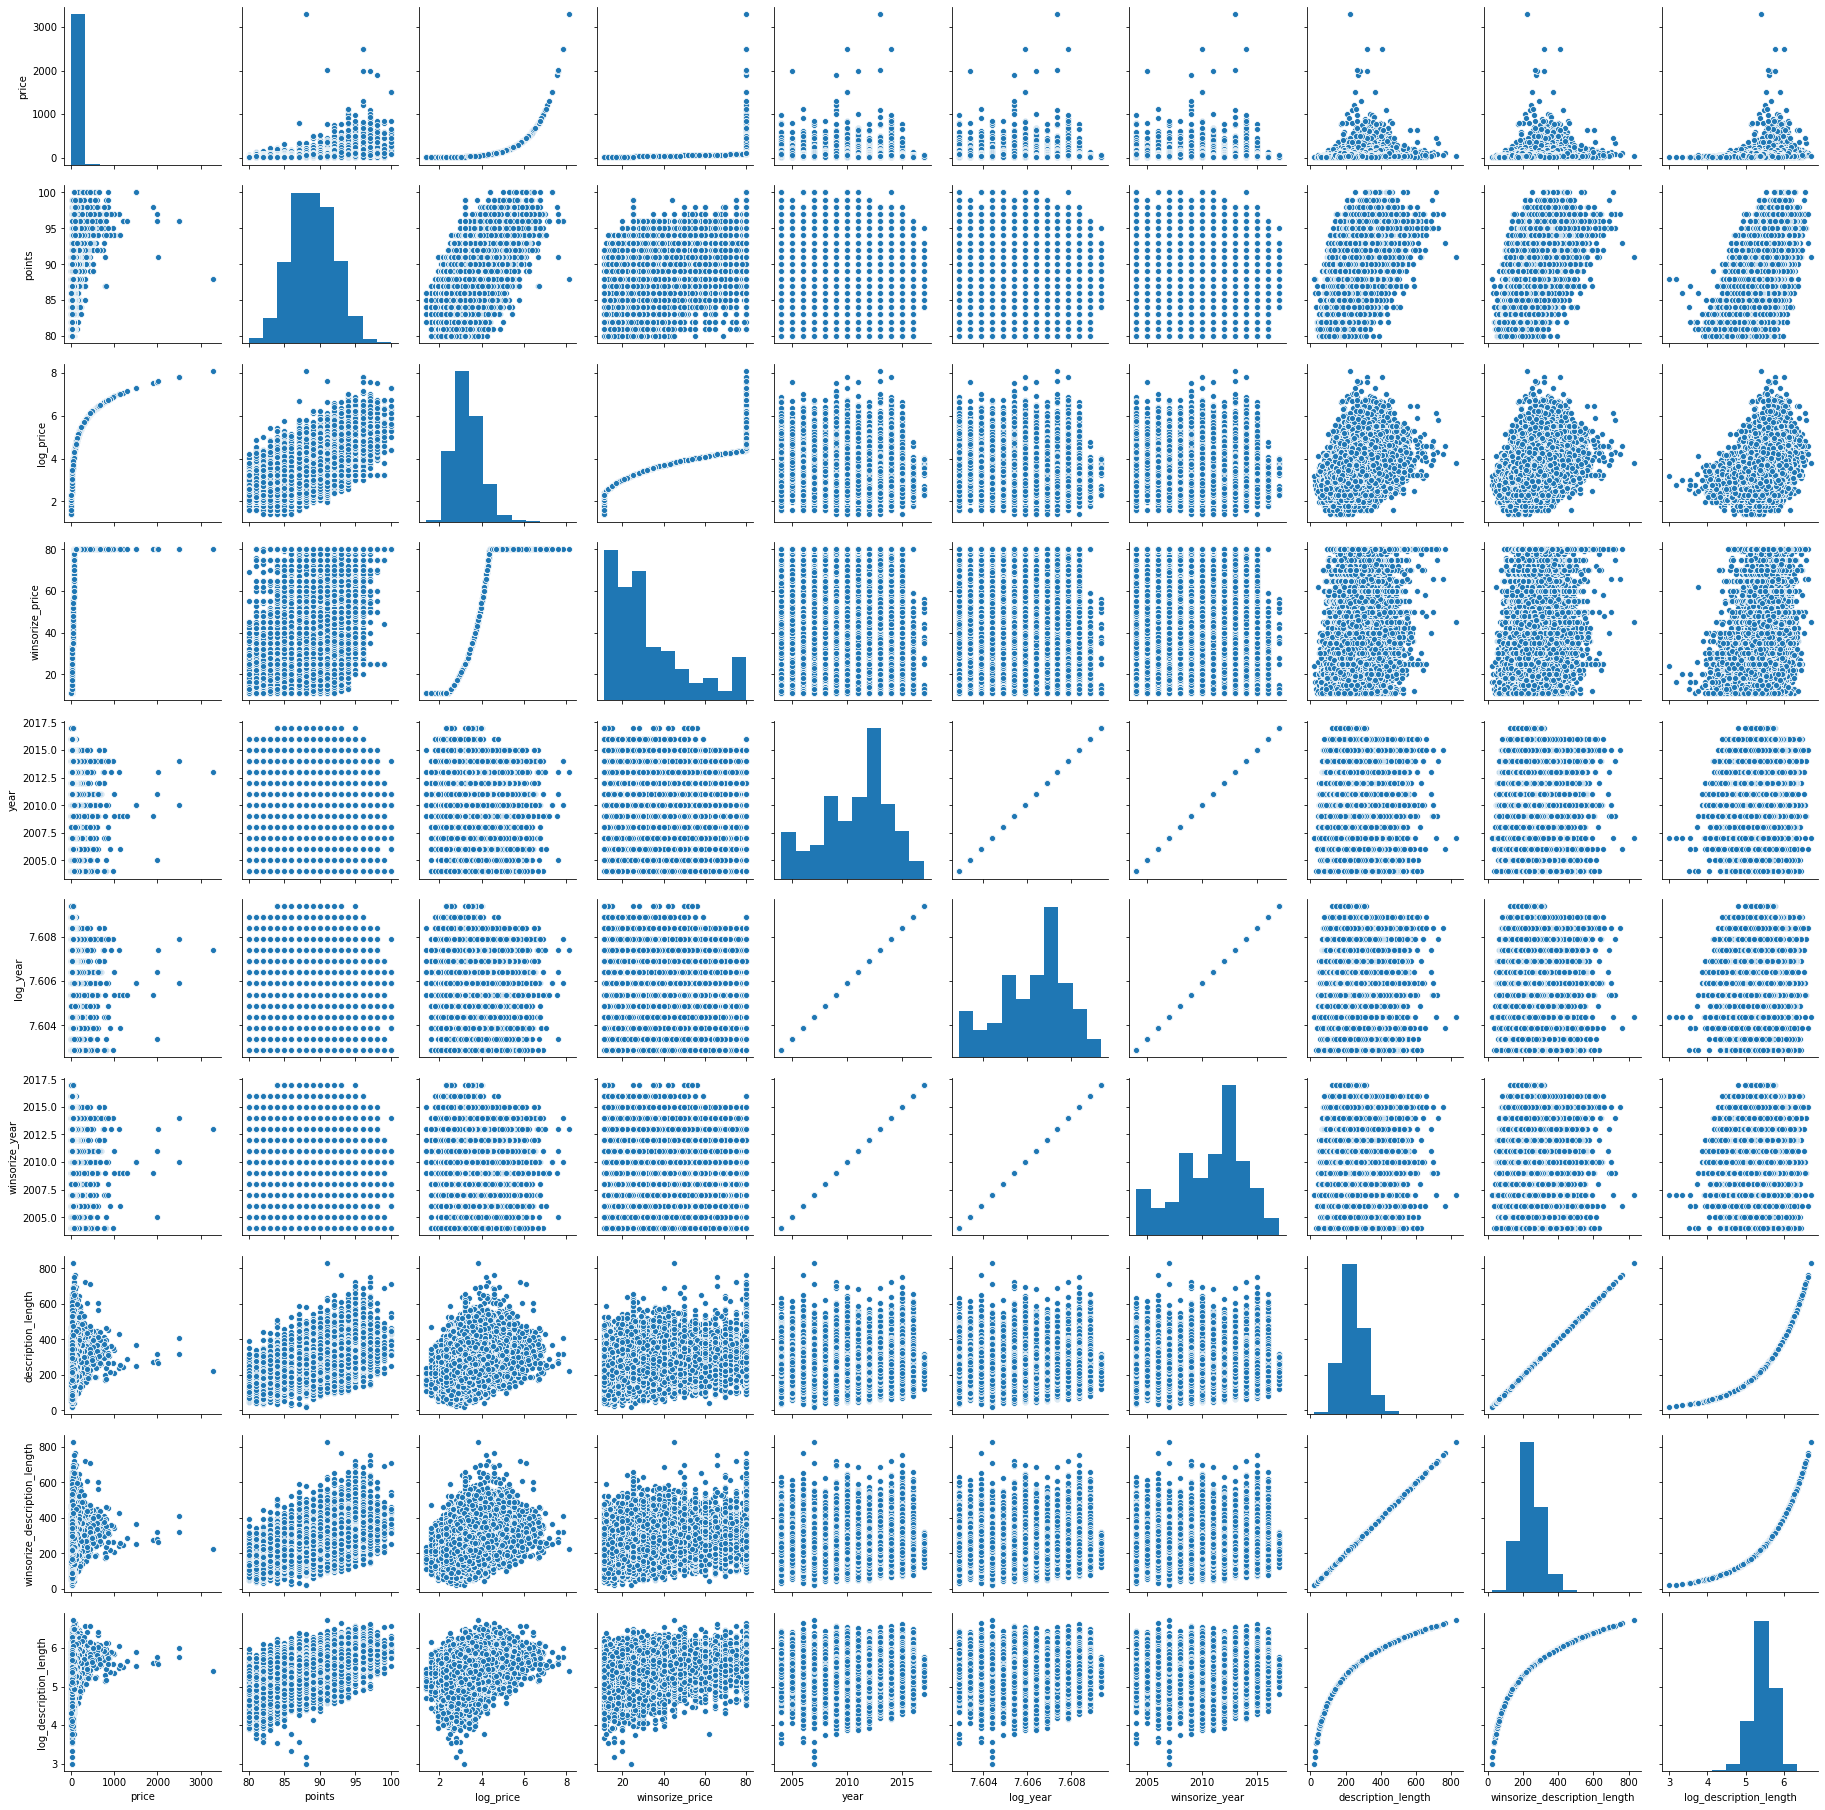

In [0]:
sns.pairplot(wine_df2)

Pairplot shows small correlation between points and price/description length. year does not seem to be that correlated to anything. Description Length and price seem to have some correlations with eachother, but we can check using a correlation matrix.

Text(0.5, 1.0, 'correlation matrix (wine)')

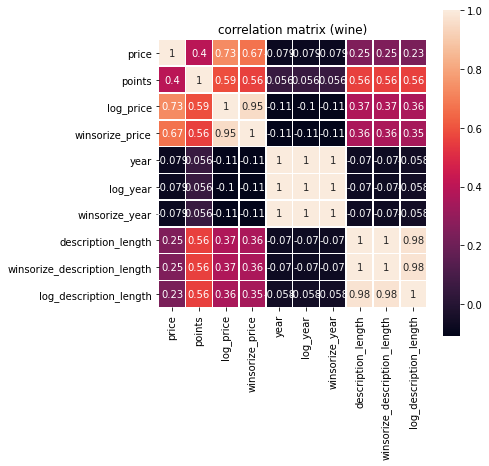

In [0]:
corrmat = wine_df2.corr()
plt.figure(figsize=(6,6))
# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (wine)")

Notice how description length has a (+) 0.56 correlation between points. Since all of the transformed models have the same correlation, the original data will be kept. 

It can be seen that there is a slight correlation between points and description_length/price. Year does not seem to have much of a correlation with anything. Description length does show a slight correlation between log(price). Other then that it does not seem there is much that can be taken away from these pairplots. 

# Now collect a dataframe with all features for first test against a model 
# X will be the features
# Y will be the target 

In [0]:
wine_df2.head()

,country,taster_name,province,variety,price,points,log_price,winsorize_price,year,log_year,winsorize_year,description_length,winsorize_description_length,log_description_length
0,Italy,Kerin O’Keefe,Sicily & Sardinia,White Blend,25.000,87,3.219,25.000,2013,7.607,2013,172,172,5.147
1,Portugal,Roger Voss,Douro,Portuguese Red,15.000,87,2.708,15.000,2011,7.606,2011,227,227,5.425
2,US,Paul Gregutt,Oregon,Pinot Gris,14.000,87,2.639,14.000,2013,7.607,2013,186,186,5.226
3,US,Alexander Peartree,Michigan,Riesling,13.000,87,2.565,13.000,2013,7.607,2013,199,199,5.293
4,US,Paul Gregutt,Oregon,Pinot Noir,65.000,87,4.174,65.000,2012,7.607,2012,249,249,5.517


In [0]:
wine_df3 = wine_df2[['country','taster_name','province','variety','log_price','year','description_length','points']]
wine_df4 = wine_df3.copy()

Get numeric values for country and taster_name columns by using get dummies. Country/Variety/Taster/Province columns all have alot of categories. It is likely that the total columns will increase above 100. 

In [0]:
wine_df3 = pd.concat([wine_df3,pd.get_dummies(wine_df3['country'],drop_first=True)], axis = 1 , ignore_index = False)
wine_df3 = wine_df3.drop(columns = 'country')
wine_df3.head()

,taster_name,province,variety,log_price,year,description_length,points,Armenia,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,China,Croatia,Cyprus,Czech Republic,Egypt,England,France,Georgia,Germany,Greece,Hungary,India,Israel,Italy,Lebanon,Luxembourg,Macedonia,Mexico,Moldova,Morocco,New Zealand,None_country,Peru,Portugal,Romania,Serbia,Slovakia,Slovenia,South Africa,Spain,Switzerland,Turkey,US,Ukraine,Uruguay
0,Kerin O’Keefe,Sicily & Sardinia,White Blend,3.219,2013,172,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Roger Voss,Douro,Portuguese Red,2.708,2011,227,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Paul Gregutt,Oregon,Pinot Gris,2.639,2013,186,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Alexander Peartree,Michigan,Riesling,2.565,2013,199,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Paul Gregutt,Oregon,Pinot Noir,4.174,2012,249,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:

wine_df3 = pd.concat([wine_df3,pd.get_dummies(wine_df3['taster_name'],drop_first=True)], axis = 1 , ignore_index = False)
wine_df3 = wine_df3.drop(columns = 'taster_name')
wine_df3 = pd.concat([wine_df3,pd.get_dummies(wine_df3['variety'],drop_first=True)], axis = 1 , ignore_index = False)
wine_df3 = wine_df3.drop(columns = 'variety')
wine_df3 = pd.concat([wine_df3,pd.get_dummies(wine_df3['province'],drop_first=True)], axis = 1 , ignore_index = False)
wine_df3 = wine_df3.drop(columns = 'province')


In [0]:
Y = wine_df3['points']
X = wine_df3.drop(columns='points')

# Model Building and Evaluation

### Split Dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=40)

#### Model Error and plot function:

In [0]:
def model_plotter(model,y_test,y_preds,X_test,X_train):
  plt.scatter(y_test, y_preds)
  plt.plot(y_test, y_test, color="red")
  plt.xlabel("true values")
  plt.ylabel("predicted values")
  plt.title("Charges: true and predicted values")
  plt.show()



  print("R-squared of the model on the training set is: {}".format(model.score(X_train, y_train)))
  print("-----Test set statistics-----")
  print("R-squared of the model on the test set is: {}".format(model.score(X_test, y_test)))
  print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
  print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
  print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
  print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
  print('total sum of all errors listed above is: {} ' .format( mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds)))
  return 

### Build Models and see which is the best

#### OLS Model:

Notice how alot of variables are set to very low coefficients

In [0]:
# We fit an OLS model using statsmodels
start_time = time.time()
results = sm.OLS(y_train,X_train).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:44:55   Log-Likelihood:            -2.0490e+05
No. Observations:               97478   AIC:                         4.120e+05
Df Residuals:                   96391   BIC:                         4.223e+05
Df Model:                        1086                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
lo

Notice how in the chart above, the data is statistically significant as shown through the Jarque-Bera value and probability. Also the F statistic is significant too. When looking at the coefficients and p values for various features in the variety/province have majority of p values that show no statistical signifcance, and coefficients that lower the feature bias to 0. It may be worth it to remove these features in the next set of modeling. Taster name also has the same problem, but with only 4/17 features , so it may be worth looking into aswell.

In [0]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
y_preds = results.predict(X_test)


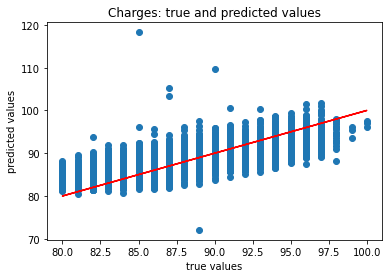

Mean absolute error of the prediction is: 1.5753547290949252
Mean squared error of the prediction is: 4.080784197921885
Root mean squared error of the prediction is: 2.020095096257076
Mean absolute percentage error of the prediction is: 1.7842934158692985
total sum of all errors listed above is: 7.676234023273887 


--- 88.228111743927 seconds ---
it took ^^^^ many seconds to run


In [0]:
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))
print('total sum of all errors listed above is: {} ' .format(mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds)))
print("\n\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

#### Elastic Regression Model:

In [0]:
start_time = time.time()
elasticregr = ElasticNet(alpha=0.5, l1_ratio=0.25) 
elasticregr.fit(X_train, y_train)
# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds = elasticregr.predict(X_test)




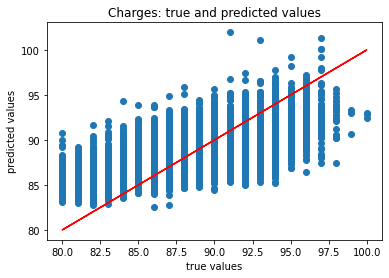

R-squared of the model on the training set is: 0.44076758492339424
-----Test set statistics-----
R-squared of the model on the test set is: 0.43375170149807274
Mean absolute error of the prediction is: 1.8062888241697184
Mean squared error of the prediction is: 5.185412751724091
Root mean squared error of the prediction is: 2.2771501381604358
Mean absolute percentage error of the prediction is: 2.045259024599012
total sum of all errors listed above is: 9.268851714054247 


--- 3.0255002975463867 seconds ---
it took ^^^^ many seconds to run


In [0]:
model_plotter(elasticregr,y_test,y_preds,X_test,X_train)
print("\n\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

#### KNN Regressor

In [0]:
start_time = time.time()
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

y_preds = knn.predict(X_test)


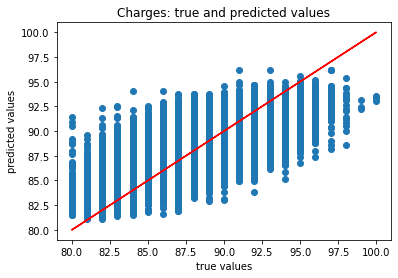

R-squared of the model on the training set is: 0.5978053817594058
-----Test set statistics-----
R-squared of the model on the test set is: 0.49558484083466914
Mean absolute error of the prediction is: 1.6895700612439601
Mean squared error of the prediction is: 4.6191764380020315
Root mean squared error of the prediction is: 2.1492269396231825
Mean absolute percentage error of the prediction is: 1.9142501862577346
total sum of all errors listed above is: 8.457973438869175 


--- 489.55215334892273 seconds ---
it took ^^^^ many seconds to run


In [0]:
model_plotter(knn,y_test,y_preds,X_test,X_train)
print("\n\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

#### Random Forest Regressor Model:

In [0]:
start_time = time.time()
rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train,y_train)
y_preds = rfr.predict(X_test)


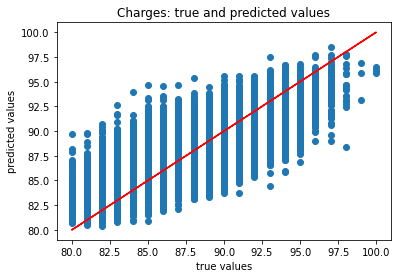

R-squared of the model on the training set is: 0.9417367713903175
-----Test set statistics-----
R-squared of the model on the test set is: 0.6119063902349535
Mean absolute error of the prediction is: 1.4330356729899016
Mean squared error of the prediction is: 3.553963090507116
Root mean squared error of the prediction is: 1.8851957698093629
Mean absolute percentage error of the prediction is: 1.6241675839155194
total sum of all errors listed above is: 6.872194533306381 


--- 461.77333402633667 seconds ---
it took ^^^^ many seconds to run


In [0]:
model_plotter(rfr,y_test,y_preds,X_test,X_train)
print("\n\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

#### Decision Tree Gradient Boosting Regressor Model:

In [0]:
params = {'n_estimators': 250,
          'max_depth': 8,
          'loss': 'ls',
         'learning_rate': .015,
         'min_samples_split':2,
         'subsample':1}
start_time = time.time()
# Initialize and fit the model.
#clf = ensemble.GradientBoostingRegressor(**params)
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)


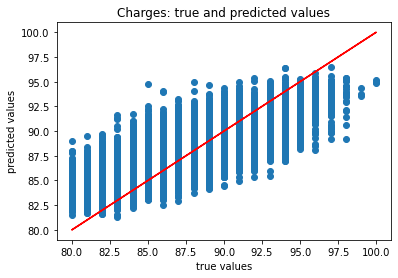

R-squared of the model on the training set is: 0.5840955578618827
-----Test set statistics-----
R-squared of the model on the test set is: 0.576391494359021
Mean absolute error of the prediction is: 1.5499993460728776
Mean squared error of the prediction is: 3.879190370550919
Root mean squared error of the prediction is: 1.9695660360980332
Mean absolute percentage error of the prediction is: 1.7560150808124488
total sum of all errors listed above is: 7.39875575272183 


--- 169.40377163887024 seconds ---
it took ^^^^ many seconds to run


In [0]:
model_plotter(clf,y_test,y_preds,X_test,X_train)
print("\n\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

Notice how this code took ~250 seconds to run. It may be worth it to use random forest due to the run time.

# Random Forest parameter tuning

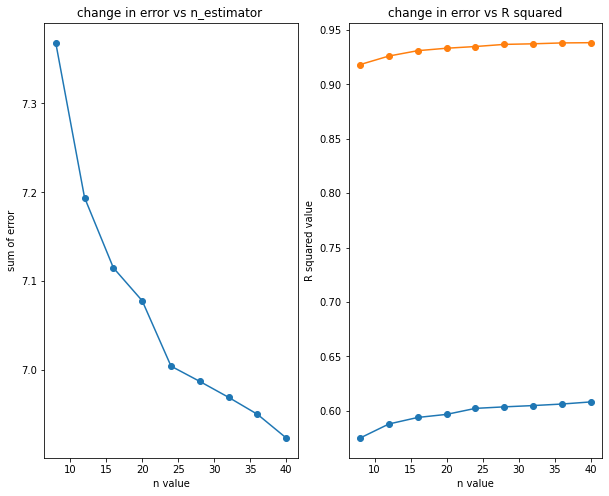

In [0]:
d = []
u = []
p = []
o = []
n = 8
for i in range(1,10):
  rfr = ensemble.RandomForestRegressor(n_estimators=n)
  rfr.fit(X_train,y_train)
  y_preds = rfr.predict(X_test)
  l = (mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds))
  m = rfr.score(X_train, y_train)
  z = rfr.score(X_test, y_test)
  p.append(m)
  o.append(z)
  u.append(l)
  d.append(n)
  n += 4
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(d, u)
plt.plot(d,u)
plt.xlabel("n value")
plt.ylabel("sum of error")
plt.title("change in error vs n_estimator ")
plt.subplot(1,2,2)
plt.scatter(d,o)
plt.plot(d,o)
plt.scatter(d,p)
plt.plot(d,p)
plt.xlabel("n value")
plt.ylabel("R squared value")
plt.title("change in error vs R squared")
plt.show()


n_estimator value of 35 shows the lowest error.

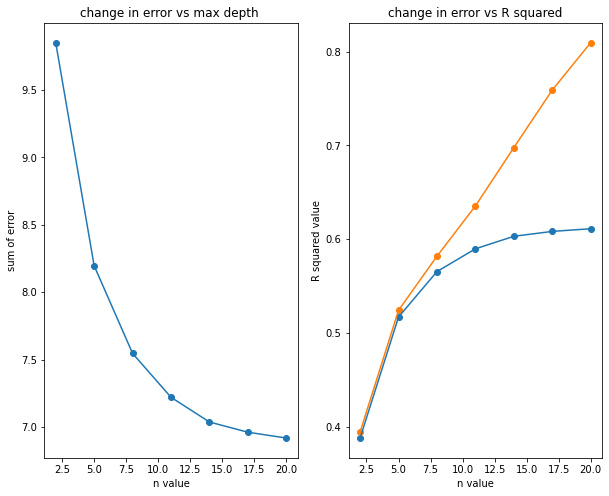

In [0]:
d = []
u = []
p = []
o = []
n = 2
for i in range(1,8):
  rfr = ensemble.RandomForestRegressor(n_estimators=35,max_depth = n)
  rfr.fit(X_train,y_train)
  y_preds = rfr.predict(X_test)
  l = (mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds))
  m = rfr.score(X_train, y_train)
  z = rfr.score(X_test, y_test)
  u.append(l)
  d.append(n)
  p.append(m)
  o.append(z)
  n += 3
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(d, u)
plt.plot(d,u)
plt.xlabel("max depth")
plt.ylabel("sum of error")
plt.title("change in error vs max depth ")
plt.subplot(1,2,2)
plt.scatter(d,o)
plt.plot(d,o)
plt.scatter(d,p)
plt.plot(d,p)
plt.xlabel("n value")
plt.ylabel("R squared value")
plt.title("change in error vs R squared")
plt.show()

Max depth of 20 shows the lowest error. However it is clear that the plot quickly shows that the model is overfit against the training set the closer to 20 you go. So it would be better to choose a value of 11 to minimize the difference between R squared and keep the model error relatively low. Since the error starts to level out around 10. 

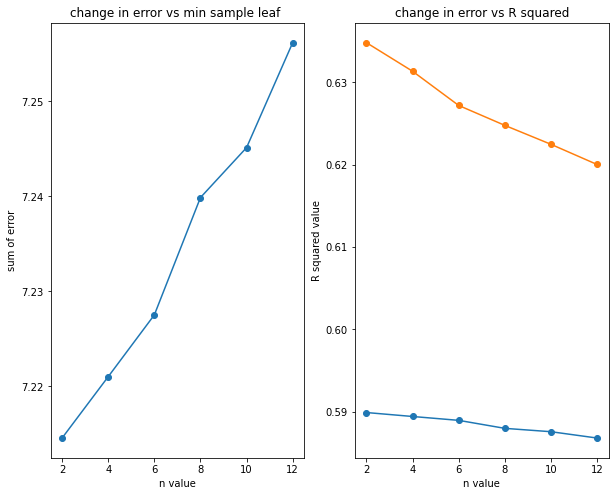

In [0]:
d = []
u = []
p = []
o = []
n = 2
for i in range(1,7):
  rfr = ensemble.RandomForestRegressor(n_estimators=35,max_depth = 11, min_samples_leaf=n)
  rfr.fit(X_train,y_train)
  y_preds = rfr.predict(X_test)
  l = (mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds))
  m = rfr.score(X_train, y_train)
  z = rfr.score(X_test, y_test)
  u.append(l)
  d.append(n)
  p.append(m)
  o.append(z)
  n += 2
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(d, u)
plt.plot(d,u)
plt.xlabel("min sample leaf")
plt.ylabel("sum of error")
plt.title("change in error vs min sample leaf ")
plt.subplot(1,2,2)
plt.scatter(d,o)
plt.plot(d,o)
plt.scatter(d,p)
plt.plot(d,p)
plt.xlabel("n value")
plt.ylabel("R squared value")
plt.title("change in error vs R squared")
plt.show()


min sample leaf shows the lowest error at 2, then error increases very quickly once the leaf increases.

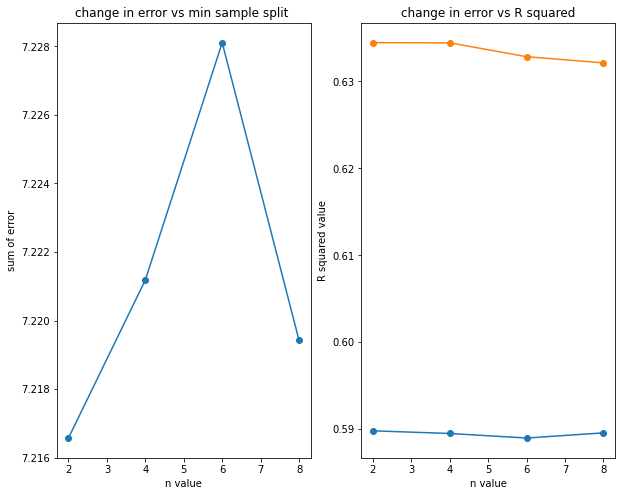

In [0]:
d = []
u = []
p = []
o = []
n = 2
for i in range(1,5):
  rfr = ensemble.RandomForestRegressor(n_estimators=35,max_depth = 11, min_samples_leaf=2,min_samples_split=n)
  rfr.fit(X_train,y_train)
  y_preds = rfr.predict(X_test)
  l = (mean_absolute_error(y_test, y_preds) + mse(y_test, y_preds) + rmse(y_test, y_preds))
  m = rfr.score(X_train, y_train)
  z = rfr.score(X_test, y_test)
  u.append(l)
  d.append(n)
  p.append(m)
  o.append(z)
  n += 2
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.scatter(d, u)
plt.plot(d,u)
plt.xlabel("min sample split")
plt.ylabel("sum of error")
plt.title("change in error vs min sample split ")
plt.subplot(1,2,2)
plt.scatter(d,o)
plt.plot(d,o)
plt.scatter(d,p)
plt.plot(d,p)
plt.xlabel("n value")
plt.ylabel("R squared value")
plt.title("change in error vs R squared")
plt.show()


max_sample_split shows the lowest error around 4

Now the Random Forest model with the tuned parameters can be chosen.

# Here is the Fully Tuned Random Forest Regressor Model 

In [0]:
import time
start_time = time.time()

rfr = ensemble.RandomForestRegressor(n_estimators=35,min_samples_leaf=2,max_depth = 11,min_samples_split=4)
rfr.fit(X_train,y_train)
y_preds = rfr.predict(X_test)

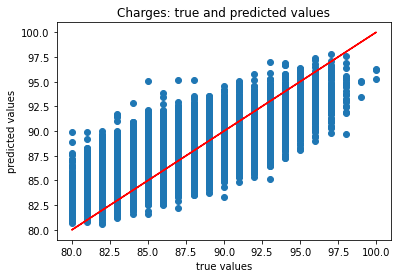

R-squared of the model on the training set is: 0.6337778393467575
-----Test set statistics-----
R-squared of the model on the test set is: 0.5891025362363754
Mean absolute error of the prediction is: 1.5231638288673748
Mean squared error of the prediction is: 3.762789140184471
Root mean squared error of the prediction is: 1.9397910042539301
Mean absolute percentage error of the prediction is: 1.7258272028298285
total sum of all errors listed above is: 7.225743973305776 
--- 108.74366497993469 seconds ---
it took ^^^^ many seconds to run


In [0]:
model_plotter(rfr,y_test,y_preds,X_test,X_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

Notice how it took ~130 seconds to run the model once, it may be worth it to find ways to speed up this model.

# Here the data in catagorical codes instead of get_dummy() form. This can be used to speed up the model run time by decreasing the total amount of columns from 100+ to under 10

In [0]:
df = wine_df2[['country','taster_name', 'year','log_price','description_length','variety','province']]
df.country = df.country.astype('category')
df.country = df.country.cat.codes
df.taster_name = df.taster_name.astype('category')
df.taster_name = df.taster_name.cat.codes
df.variety = df.variety.astype('category')
df.variety = df.variety.cat  .codes
df.province = df.province.astype('category')
df.province = df.province.cat.codes
print('this is with cat.codes()')
print(df.shape)
print('\n this is with get_dummies()')
print(wine_df3.shape)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df,Y,random_state=40)

this is with cat.codes()
(129971, 7)

 this is with get_dummies()
(129971, 1198)


Now you can see the string features of taster_name, country, variety,province were all changed to cat.codes() which means they are numerical codes that relate to each unique value of the column. This should speed up the processing time and allow for feature and parameter analysis on the models. It is shown that there is 1191 less columns in the new data frame. 

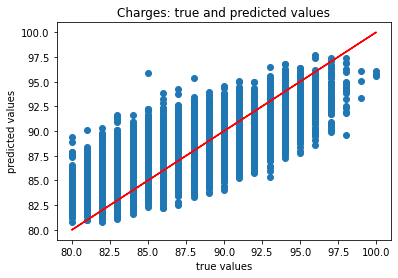

R-squared of the model on the training set is: 0.6479659981912453
-----Test set statistics-----
R-squared of the model on the test set is: 0.5961831328885747
Mean absolute error of the prediction is: 1.5073304704716397
Mean squared error of the prediction is: 3.697948651891147
Root mean squared error of the prediction is: 1.9230051096892975
Mean absolute percentage error of the prediction is: 1.7078655540868712
total sum of all errors listed above is: 7.128284232052084 

--- 8.002572536468506 seconds ---
it took ^^^^ many seconds to run


In [0]:

start_time = time.time()
rfr = ensemble.RandomForestRegressor(n_estimators=38,min_samples_leaf=2,max_depth = 11,min_samples_split=4)
rfr.fit(X_train3,y_train3)
y_preds3= rfr.predict(X_test3)
model_plotter(rfr,y_test3,y_preds3,X_test3,X_train3)
print("\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

It looks like this model speed was increase by a magnitude of 10! It ran for about 10 seconds instead of 100. The error sum went up, but not by a big enough amount to argue against using cat.codes() method.

# Now check the importances of features. 

[0.03005144 0.06714048 0.04135523 0.5003263  0.31627507 0.0221841
 0.02266738]


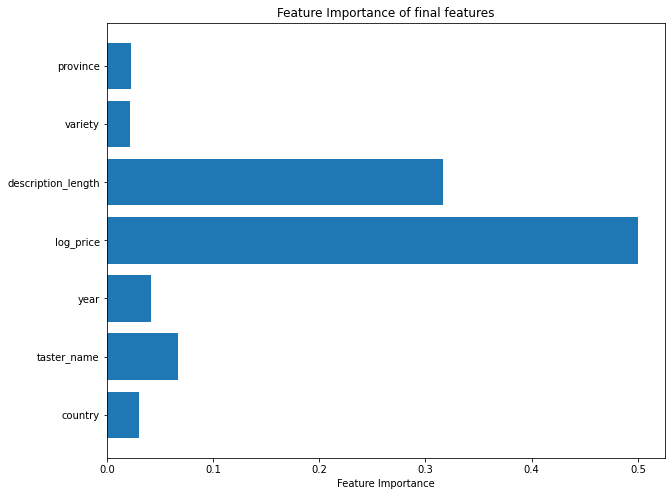

In [0]:
y = rfr.feature_importances_
print(y)
plt.figure(figsize=(10,8))
plt.barh(df.columns,y)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of final features')
plt.show()

### Looks like log_price and description_length have significantly higher values for feature importance. It may be worth it to try and create a model with just these variables to look at the effect on error.

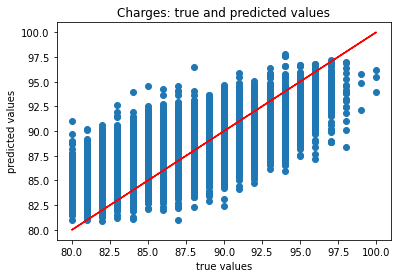

R-squared of the model on the training set is: 0.5309585361404769
-----Test set statistics-----
R-squared of the model on the test set is: 0.4909874039040051
Mean absolute error of the prediction is: 1.7005470705743093
Mean squared error of the prediction is: 4.66127741764044
Root mean squared error of the prediction is: 2.1589991703658526
Mean absolute percentage error of the prediction is: 1.92787992469237
total sum of all errors listed above is: 8.520823658580602 

--- 3.374458074569702 seconds ---
it took ^^^^ many seconds to run


In [0]:
df2 = wine_df2[['log_price','description_length']]


X_train3, X_test3, y_train3, y_test3 = train_test_split(df2,Y,random_state=40)
start_time = time.time()
rfr = ensemble.RandomForestRegressor(n_estimators=35,min_samples_leaf=2,max_depth = 11,min_samples_split=4)
rfr.fit(X_train3,y_train3)
y_preds3= rfr.predict(X_test3)
model_plotter(rfr,y_test3,y_preds3,X_test3,X_train3)
print("\n--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

It looks like removing the low values for feature importance increased our models error by a small amount, therefore it is decided to not take out any of the features. However future analysis may lead to the removal of these.

# This is the final Model. A RandomForestRegressor with n_estimators = 35, max depth = 11, min_sample_leaf = 2, and min_sample_split = 4. It takes roughly 11 seconds to run, and has a total sum error of ~7. The training set has a R squared value of ~ 0.79 while the test set has ~0.61. This shows a slight overfit of the model, but it has been tuned through the parameters. 

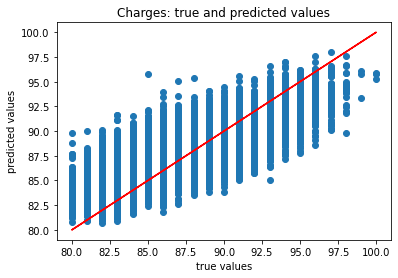

R-squared of the model on the training set is: 0.6471665374980418
-----Test set statistics-----
R-squared of the model on the test set is: 0.5951592658687639
Mean absolute error of the prediction is: 1.5091273726137888
Mean squared error of the prediction is: 3.7073247032005145
Root mean squared error of the prediction is: 1.9254414307375114
Mean absolute percentage error of the prediction is: 1.70991630094974
total sum of all errors listed above is: 7.141893506551815 
--- 7.423197269439697 seconds ---
it took ^^^^ many seconds to run


In [0]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df,Y,random_state=40)
start_time = time.time()
rfr = ensemble.RandomForestRegressor(n_estimators=35,min_samples_leaf=2,max_depth = 11,min_samples_split=4)
rfr.fit(X_train3,y_train3)
y_preds3= rfr.predict(X_test3)
model_plotter(rfr,y_test3,y_preds3,X_test3,X_train3)
print("--- %s seconds ---" % (time.time() - start_time))
print('it took ^^^^ many seconds to run')

# Closing Statements

The most important features were the price and the description length. However even though the rest of the features had an importance of less than 0.1, it was decided to keep them because the overall error of the model went up when these were removed. It was also decided to use the cat.codes() method instead of get_dummies() for categorical to numerical conversions because the overall time of the model decreased significantly without alot of effect to the error. The model was originally overfit, but through tuning the parameters of the randomforest model it was decreased to an acceptable amount. Leaving a model with the characteristics listed below:

Random Forest Model with parameters <br>
n_estimators=35 <br>
min_samples_leaf=2<br>
max_depth = 11<br>
min_samples_split=4<br>





R-squared of the model on the training set is: 0.6473840265177836 <br>
-----Test set statistics-----<br>
R-squared of the model on the test set is: 0.5953833000871709<br>
Mean absolute error of the prediction is: 1.509611426492157<br>
Mean squared error of the prediction is: 3.7052731122358735<br>
Root mean squared error of the prediction is: 1.9249085984108112<br>
Mean absolute percentage error of the prediction is: 1.710375132149589<br>
total sum of all errors listed above is: 7.139793137138842 <br>

--- 7.451271057128906 seconds ---<br>
it took ^^^^ many seconds to run

# Future Scope

First off, the taster_name column could have more engineering done to it. Since it was missing a significant amount of values it could have led to bias in the data. Taking more time to see the effect of the taster column could lead to significant changes int he accuracy 

Again as discussed with the feature_importance analysis. It may be worth it to spend more time to analyze the features and if the features with very low importance can be removed.

This model could also be switched up to predict price of wine based on the score. If a business that sells wine knows their points from WineEnthusiast it could help with decisions on wine pricing. 